# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from base_models import BaseModel
from model_creator import Optimizer, MTLApproach
from model_evaluator import DataSource, DataPredSelection

 ==> Restrict GPU memory growth: True


# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for ALL requisites - 50 epochs - using second approach of handcrafted method,' + \
            'which splits the ICAO reqs and its branches into previously determined groups. Removing rotation from operations of data augmentation' + \
            ' and using minor shift (width and height).',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl', '50 epochs', 'handcrafted_2'],
        'src_files': ["src/**/*.py"]
    },
    'properties': {
        'mtl_approach': MTLApproach.HAND_2,
        'reqs': list(cts.ICAO_REQ),
        'aligned': False,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 32,
        'n_epochs': 2,
        'early_stopping': 50,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 87614
Process ID: 92977
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'exp_params': {'description': 'Training mtl network for ALL requisites - 50 '
                               'epochs - using second approach of handcrafted '
                               'method,which splits the ICAO reqs and its '
                               'branches into previously determined groups. '
                               'Removing rotation from operations of data '
                               'augmentation and using minor shift (width and '
                               'height).',
                'name': 'train_vgg16',
                'src_files': ['src/**/*.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'mtl',
                         '50 epochs',
  

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setup neptune properties and parameters
Properties and parameters setup done!


# Labels Distribution

In [9]:
runner.summary_labels_dist()

-------------------- summary labels dist -------------------
Requisite: MOUTH
N_TRAIN_COMP: 3607 (73.19%)
N_TRAIN_NOT_COMP: 1321 (26.81%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 420 (76.78%)
N_VALIDATION_NOT_COMP: 127 (23.22%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 215 (74.65%)
N_TEST_NOT_COMP: 73 (25.35%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: ROTATION
N_TRAIN_COMP: 3716 (75.41%)
N_TRAIN_NOT_COMP: 1212 (24.59%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 410 (74.95%)
N_VALIDATION_NOT_COMP: 137 (25.05%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 208 (72.22%)
N_TEST_NOT_COMP: 80 (27.78%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: L_AWAY
N_TRAIN_COMP: 3375 (68.49%)
N_TRAIN_NOT_COMP: 1553 (31.51%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 382 (69.84%)
N_VALIDATION_NOT_COMP: 165 (30.16%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 201 (69.79%)
N_TEST_NOT_COMP: 87 (30.21%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: EYES_CLOSED
N_TRAIN_COMP: 3887 (78.88%)
N_TRAIN_NOT_COMP: 1041 (21.12%)
N_TRAIN_D

# Create Model

In [10]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

-------------------- vizualize model -------------------


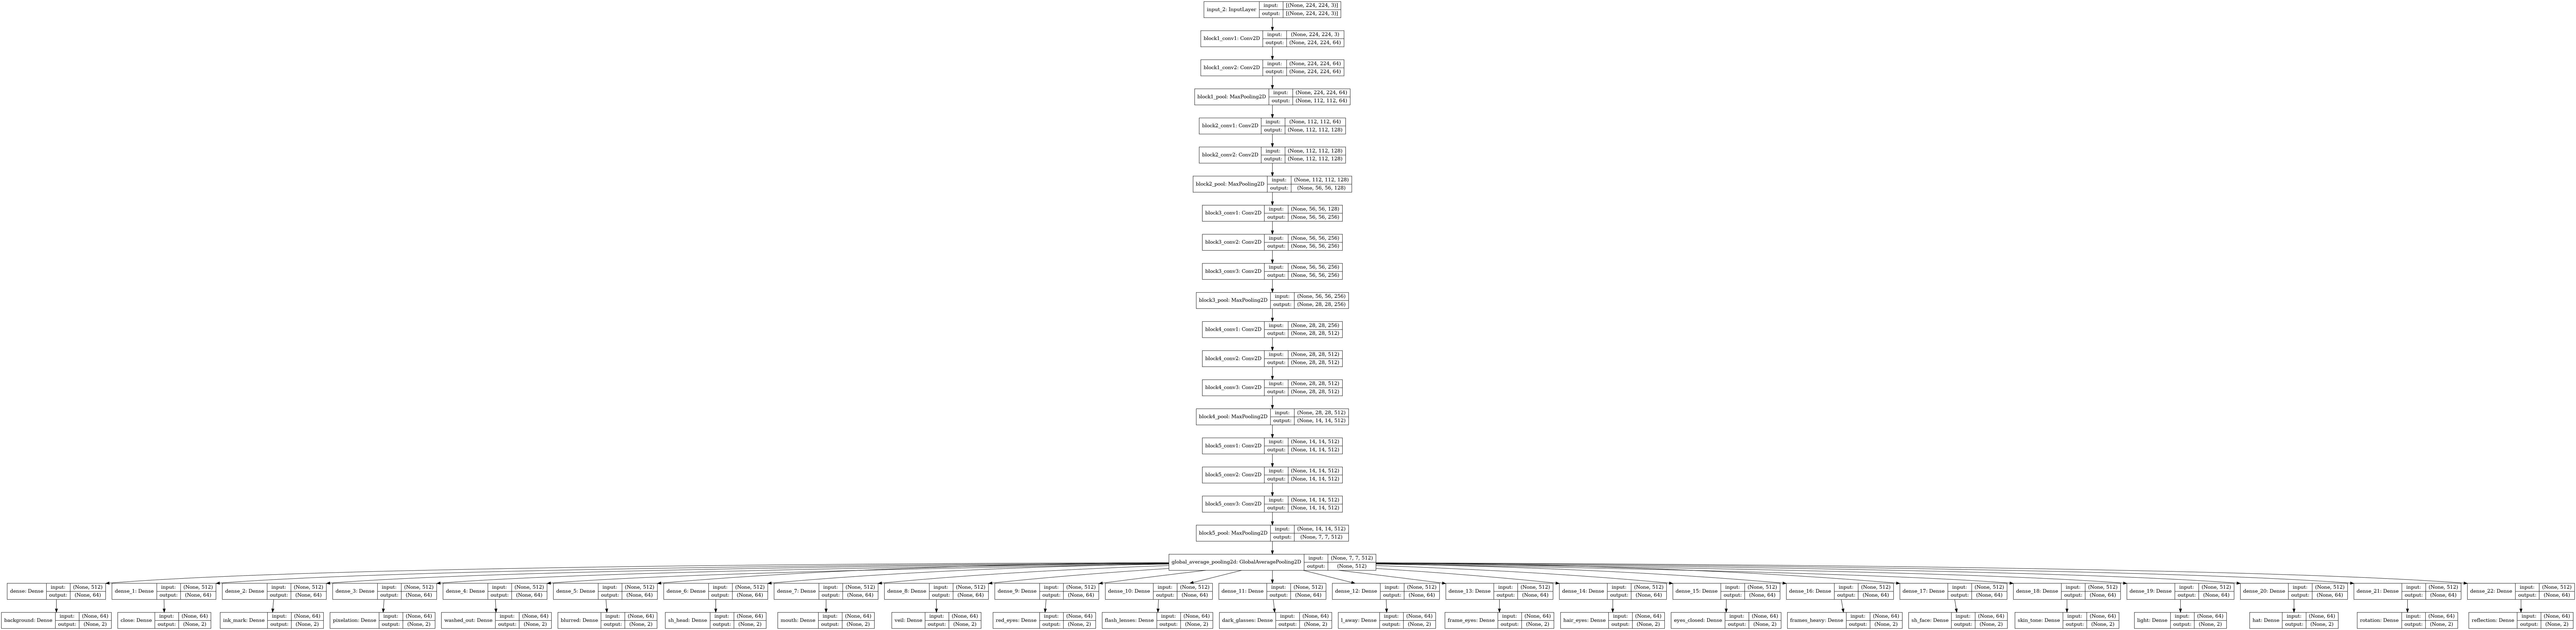

In [11]:
runner.vizualize_model(outfile_path=f"figs/handcrafted_mtl_model_2.png")

In [12]:
runner.model_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Training Model

In [13]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
 .. Not fine tuning base model...
  .. Total params: 15,472,814
  .. Trainable params: 758,126
  .. Non-trainable params: 14,714,688
Epoch 1/2


154/154 [==============================] - 399s 3s/step - loss: 1.1186 - background_loss: 0.6429 - close_loss: 0.5901 - ink_mark_loss: 0.6687 - pixelation_loss: 0.5610 - washed_out_loss: 0.0902 - blurred_loss: 0.4306 - sh_head_loss: 0.4025 - mouth_loss: 0.0883 - veil_loss: 0.6027 - red_eyes_loss: 0.5605 - flash_lenses_loss: 0.3769 - dark_glasses_loss: 0.8161 - l_away_loss: 0.3990 - frame_eyes_loss: 0.6754 - hair_eyes_loss: 0.7157 - eyes_closed_loss: 0.3990 - frames_heavy_loss: 0.2819 - sh_face_loss: 0.7163 - skin_tone_loss: 0.1483 - light_loss: 0.2881 - hat_loss: 0.4953 - rotation_loss: 0.6785 - reflection_loss: 0.5580 - background_accuracy: 0.7119 - close_accuracy: 0.7445 - ink_mark_accuracy: 0.6723 - pixelation_accuracy: 0.7772 - washed_out_accuracy: 0.9795 - blurred_accuracy: 0.8513 - sh_head_accuracy: 0.8691 - mouth_accuracy: 0.9813 - veil_accuracy: 0.7023 - red_eyes_accuracy: 0.7806 - flash_lenses_accuracy: 0.9174 - dark_glasses_accuracy: 0.5357 - l_away_accuracy: 0.8914 - frame_e

# Plots

 ==> Restrict GPU memory growth: True
-------------------- draw training history -------------------


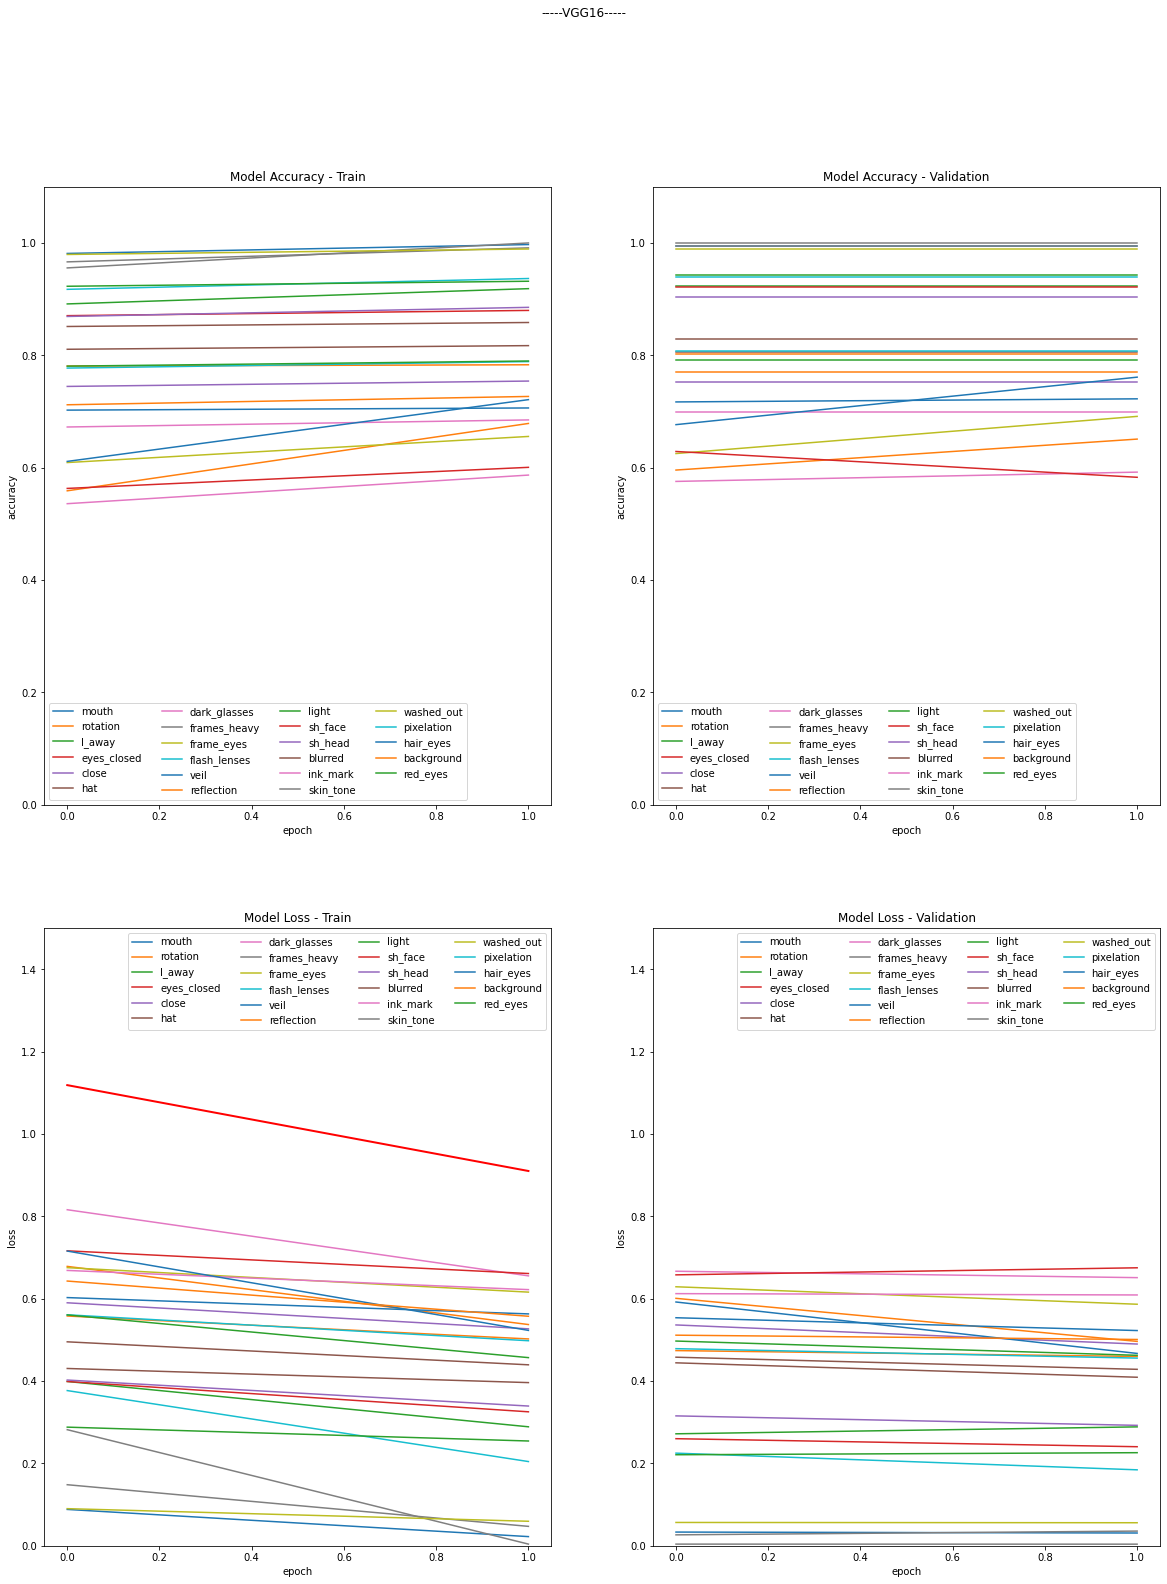

In [15]:
runner.draw_training_history()

# Load Best Model

In [16]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [17]:
runner.save_model()

-------------------- save model -------------------
Saving model
INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

Testing Trained Model
Predicting labels....
18/18 [==============================] - 33s 2s/step
Prediction finished!
Requisite: MOUTH


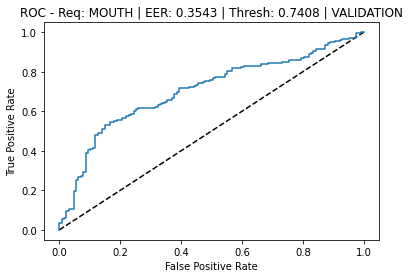

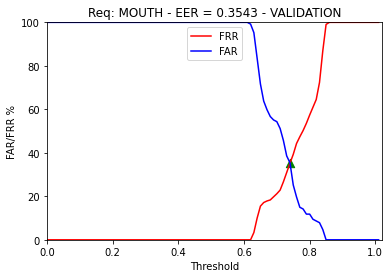

Requisite: MOUTH - EER_interp: 35.43% - Best Threshold: 0.740770339965831
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.35      0.65      0.46       127
    COMPLIANT       0.86      0.65      0.74       420

     accuracy                           0.65       547
    macro avg       0.61      0.65      0.60       547
 weighted avg       0.74      0.65      0.67       547

Confusion matrix ----------------------------------------
FAR: 35.43% | FRR: 35.480000000000004% | EER_mean: 35.46% | TP: 271 | TN: 82 | FP: 45 | FN: 149
Accuracy ------------------------------------------------
Model Accuracy: 64.53%
---------------------------------------------------------
Requisite: ROTATION


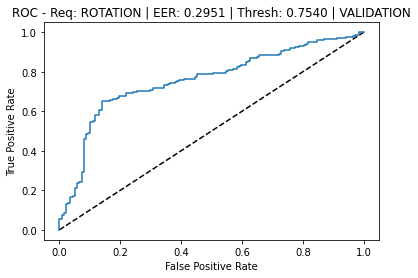

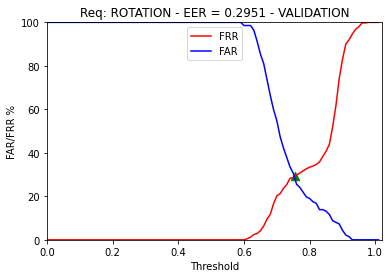

Requisite: ROTATION - EER_interp: 29.509999999999998% - Best Threshold: 0.7539831435292716
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.45      0.72      0.55       137
    COMPLIANT       0.88      0.70      0.78       410

     accuracy                           0.71       547
    macro avg       0.66      0.71      0.67       547
 weighted avg       0.77      0.71      0.72       547

Confusion matrix ----------------------------------------
FAR: 28.470000000000002% | FRR: 29.509999999999998% | EER_mean: 28.99% | TP: 289 | TN: 98 | FP: 39 | FN: 121
Accuracy ------------------------------------------------
Model Accuracy: 70.75%
---------------------------------------------------------
Requisite: L_AWAY


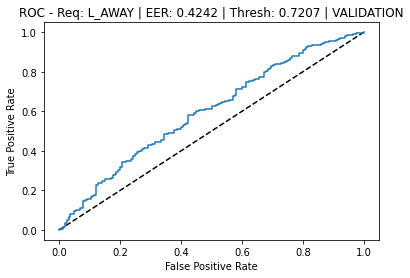

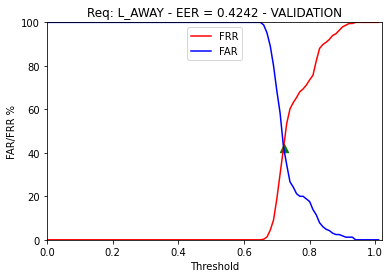

Requisite: L_AWAY - EER_interp: 42.42% - Best Threshold: 0.7206612229346796
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.37      0.58      0.45       165
    COMPLIANT       0.76      0.58      0.66       382

     accuracy                           0.58       547
    macro avg       0.57      0.58      0.56       547
 weighted avg       0.64      0.58      0.60       547

Confusion matrix ----------------------------------------
FAR: 42.42% | FRR: 41.88% | EER_mean: 42.15% | TP: 222 | TN: 95 | FP: 70 | FN: 160
Accuracy ------------------------------------------------
Model Accuracy: 57.95%
---------------------------------------------------------
Requisite: EYES_CLOSED


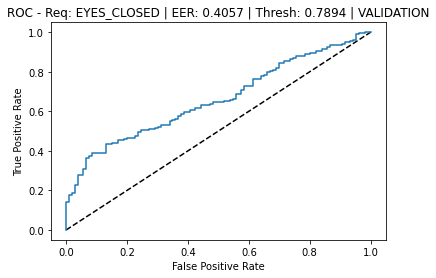

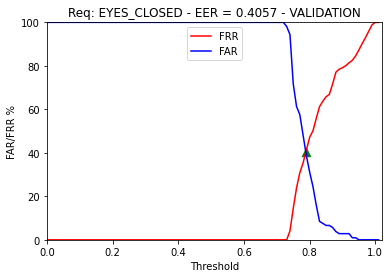

Requisite: EYES_CLOSED - EER_interp: 40.57% - Best Threshold: 0.7894018292427137
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.26      0.59      0.36       106
    COMPLIANT       0.86      0.59      0.70       441

     accuracy                           0.59       547
    macro avg       0.56      0.59      0.53       547
 weighted avg       0.74      0.59      0.64       547

Confusion matrix ----------------------------------------
FAR: 40.57% | FRR: 40.589999999999996% | EER_mean: 40.58% | TP: 262 | TN: 63 | FP: 43 | FN: 179
Accuracy ------------------------------------------------
Model Accuracy: 59.41%
---------------------------------------------------------
Requisite: CLOSE


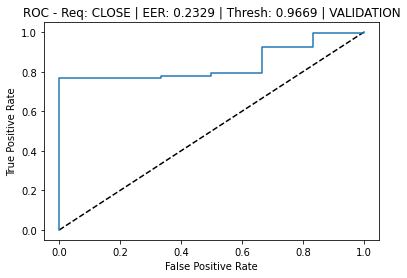

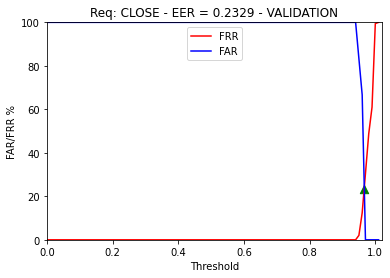

Requisite: CLOSE - EER_interp: 23.29% - Best Threshold: 0.9668692932111278
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.04      0.83      0.07         6
    COMPLIANT       1.00      0.77      0.87       541

     accuracy                           0.77       547
    macro avg       0.52      0.80      0.47       547
 weighted avg       0.99      0.77      0.86       547

Confusion matrix ----------------------------------------
FAR: 16.669999999999998% | FRR: 23.29% | EER_mean: 19.98% | TP: 415 | TN: 5 | FP: 1 | FN: 126
Accuracy ------------------------------------------------
Model Accuracy: 76.78%
---------------------------------------------------------
Requisite: HAT


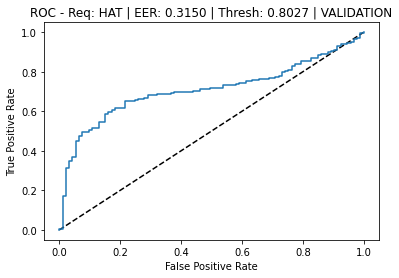

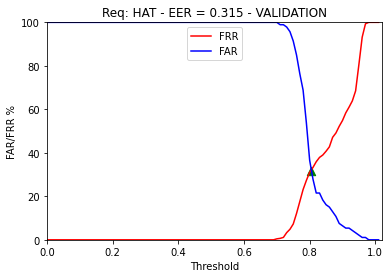

Requisite: HAT - EER_interp: 31.5% - Best Threshold: 0.8026617626261606
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.31      0.69      0.43        93
    COMPLIANT       0.91      0.69      0.78       454

     accuracy                           0.69       547
    macro avg       0.61      0.69      0.61       547
 weighted avg       0.81      0.69      0.72       547

Confusion matrix ----------------------------------------
FAR: 31.180000000000003% | FRR: 31.5% | EER_mean: 31.34% | TP: 311 | TN: 64 | FP: 29 | FN: 143
Accuracy ------------------------------------------------
Model Accuracy: 68.56%
---------------------------------------------------------
Requisite: DARK_GLASSES


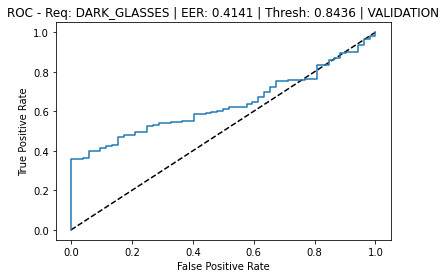

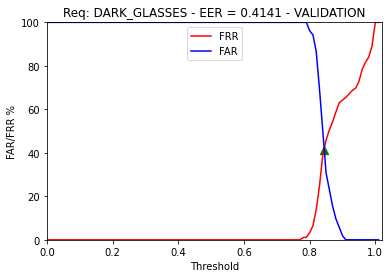

Requisite: DARK_GLASSES - EER_interp: 41.410000000000004% - Best Threshold: 0.8435757115031733
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.13      0.60      0.22        52
    COMPLIANT       0.93      0.59      0.72       495

     accuracy                           0.59       547
    macro avg       0.53      0.59      0.47       547
 weighted avg       0.86      0.59      0.67       547

Confusion matrix ----------------------------------------
FAR: 40.38% | FRR: 41.410000000000004% | EER_mean: 40.9% | TP: 290 | TN: 31 | FP: 21 | FN: 205
Accuracy ------------------------------------------------
Model Accuracy: 58.68%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


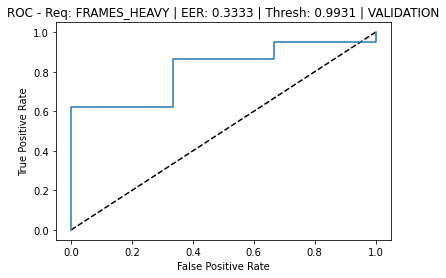

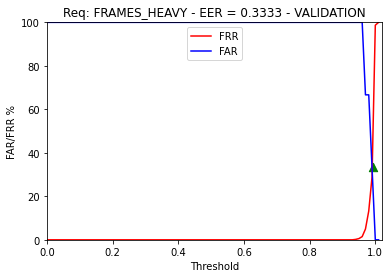

Requisite: FRAMES_HEAVY - EER_interp: 33.33% - Best Threshold: 0.993115246295929
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.01      0.67      0.02         3
    COMPLIANT       1.00      0.62      0.77       544

     accuracy                           0.62       547
    macro avg       0.50      0.64      0.39       547
 weighted avg       0.99      0.62      0.76       547

Confusion matrix ----------------------------------------
FAR: 33.33% | FRR: 37.87% | EER_mean: 35.6% | TP: 338 | TN: 2 | FP: 1 | FN: 206
Accuracy ------------------------------------------------
Model Accuracy: 62.160000000000004%
---------------------------------------------------------
Requisite: FRAME_EYES


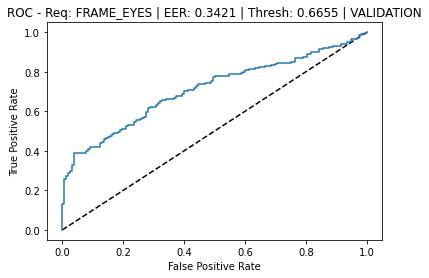

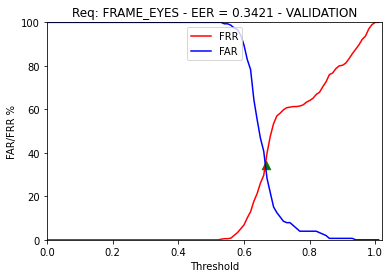

Requisite: FRAME_EYES - EER_interp: 34.21% - Best Threshold: 0.6654682755470311
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.42      0.66      0.52       152
    COMPLIANT       0.83      0.66      0.73       395

     accuracy                           0.66       547
    macro avg       0.63      0.66      0.62       547
 weighted avg       0.72      0.66      0.67       547

Confusion matrix ----------------------------------------
FAR: 34.21% | FRR: 34.43% | EER_mean: 34.32% | TP: 259 | TN: 100 | FP: 52 | FN: 136
Accuracy ------------------------------------------------
Model Accuracy: 65.63%
---------------------------------------------------------
Requisite: FLASH_LENSES


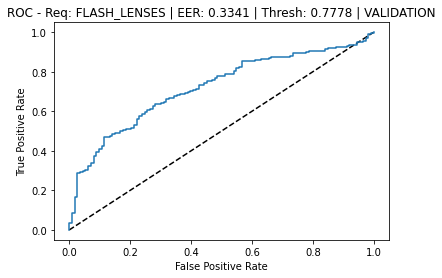

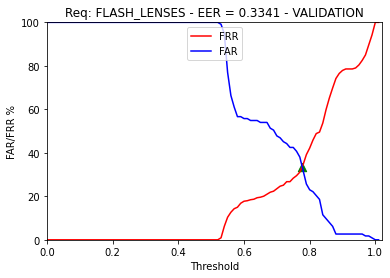

Requisite: FLASH_LENSES - EER_interp: 33.410000000000004% - Best Threshold: 0.7777719942655431
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.34      0.67      0.46       113
    COMPLIANT       0.89      0.67      0.76       434

     accuracy                           0.67       547
    macro avg       0.62      0.67      0.61       547
 weighted avg       0.77      0.67      0.70       547

Confusion matrix ----------------------------------------
FAR: 32.74% | FRR: 33.410000000000004% | EER_mean: 33.08% | TP: 289 | TN: 76 | FP: 37 | FN: 145
Accuracy ------------------------------------------------
Model Accuracy: 66.73%
---------------------------------------------------------
Requisite: VEIL


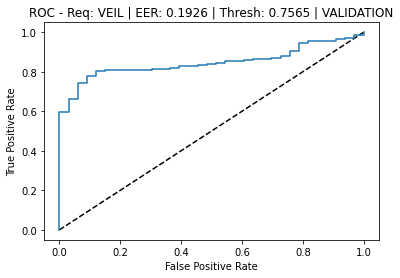

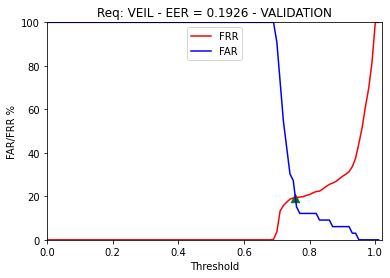

Requisite: VEIL - EER_interp: 19.259999999999998% - Best Threshold: 0.7564696859176984
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.22      0.85      0.35        33
    COMPLIANT       0.99      0.81      0.89       514

     accuracy                           0.81       547
    macro avg       0.60      0.83      0.62       547
 weighted avg       0.94      0.81      0.86       547

Confusion matrix ----------------------------------------
FAR: 15.15% | FRR: 19.259999999999998% | EER_mean: 17.2% | TP: 415 | TN: 28 | FP: 5 | FN: 99
Accuracy ------------------------------------------------
Model Accuracy: 80.99%
---------------------------------------------------------
Requisite: REFLECTION


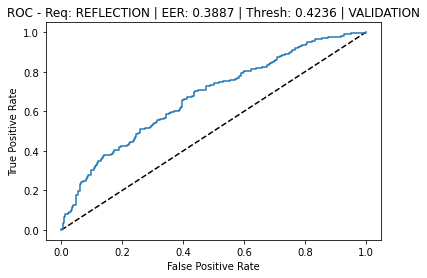

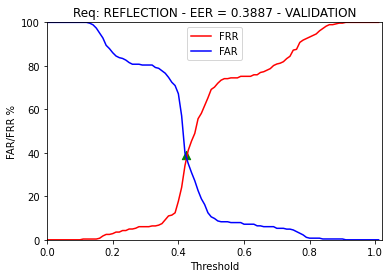

Requisite: REFLECTION - EER_interp: 38.87% - Best Threshold: 0.4236328005790874
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.59      0.61      0.60       265
    COMPLIANT       0.62      0.61      0.62       282

     accuracy                           0.61       547
    macro avg       0.61      0.61      0.61       547
 weighted avg       0.61      0.61      0.61       547

Confusion matrix ----------------------------------------
FAR: 38.87% | FRR: 39.36% | EER_mean: 39.12% | TP: 171 | TN: 162 | FP: 103 | FN: 111
Accuracy ------------------------------------------------
Model Accuracy: 60.88%
---------------------------------------------------------
Requisite: LIGHT


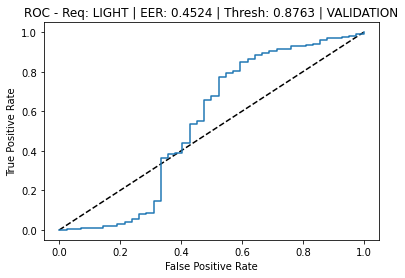

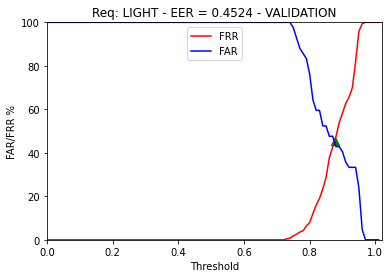

Requisite: LIGHT - EER_interp: 45.24% - Best Threshold: 0.8763198852539047
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.09      0.55      0.16        42
    COMPLIANT       0.94      0.55      0.69       505

     accuracy                           0.55       547
    macro avg       0.51      0.55      0.42       547
 weighted avg       0.87      0.55      0.65       547

Confusion matrix ----------------------------------------
FAR: 45.24% | FRR: 45.15% | EER_mean: 45.2% | TP: 277 | TN: 23 | FP: 19 | FN: 228
Accuracy ------------------------------------------------
Model Accuracy: 54.84%
---------------------------------------------------------
Requisite: SH_FACE


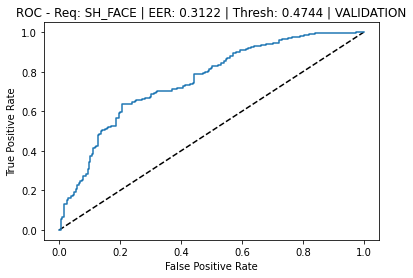

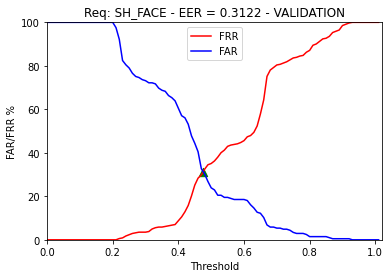

Requisite: SH_FACE - EER_interp: 31.22% - Best Threshold: 0.47437575459482717
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.57      0.69      0.62       205
    COMPLIANT       0.79      0.69      0.73       342

     accuracy                           0.69       547
    macro avg       0.68      0.69      0.68       547
 weighted avg       0.70      0.69      0.69       547

Confusion matrix ----------------------------------------
FAR: 31.22% | FRR: 31.290000000000003% | EER_mean: 31.259999999999998% | TP: 235 | TN: 141 | FP: 64 | FN: 107
Accuracy ------------------------------------------------
Model Accuracy: 68.74%
---------------------------------------------------------
Requisite: SH_HEAD


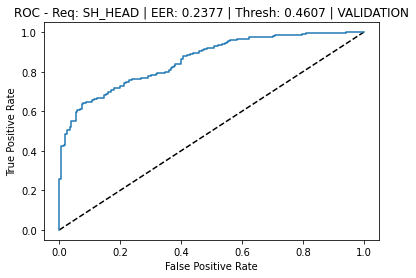

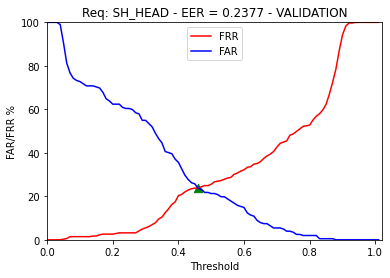

Requisite: SH_HEAD - EER_interp: 23.77% - Best Threshold: 0.46069258460099716
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.65      0.76      0.70       202
    COMPLIANT       0.85      0.76      0.80       345

     accuracy                           0.76       547
    macro avg       0.75      0.76      0.75       547
 weighted avg       0.77      0.76      0.77       547

Confusion matrix ----------------------------------------
FAR: 23.76% | FRR: 23.77% | EER_mean: 23.76% | TP: 263 | TN: 154 | FP: 48 | FN: 82
Accuracy ------------------------------------------------
Model Accuracy: 76.23%
---------------------------------------------------------
Requisite: BLURRED


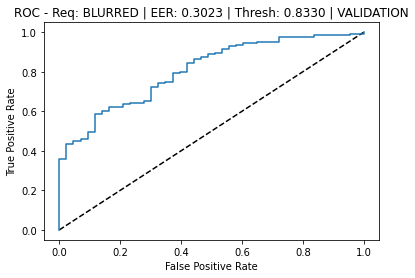

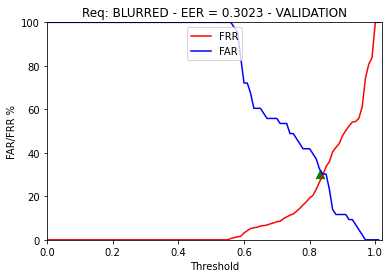

Requisite: BLURRED - EER_interp: 30.23% - Best Threshold: 0.8329612612724226
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.18      0.70      0.28        43
    COMPLIANT       0.97      0.72      0.83       504

     accuracy                           0.72       547
    macro avg       0.57      0.71      0.56       547
 weighted avg       0.90      0.72      0.78       547

Confusion matrix ----------------------------------------
FAR: 30.23% | FRR: 27.58% | EER_mean: 28.910000000000004% | TP: 365 | TN: 30 | FP: 13 | FN: 139
Accuracy ------------------------------------------------
Model Accuracy: 72.21%
---------------------------------------------------------
Requisite: SKIN_TONE


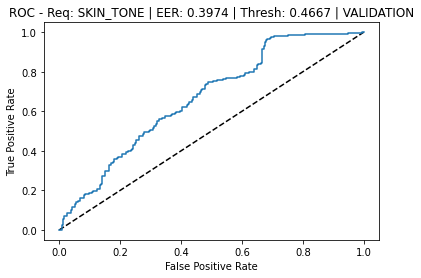

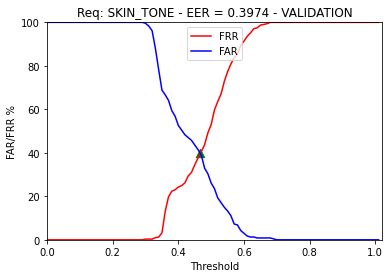

Requisite: SKIN_TONE - EER_interp: 39.739999999999995% - Best Threshold: 0.4667470753192786
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.53      0.60      0.57       234
    COMPLIANT       0.67      0.60      0.64       313

     accuracy                           0.60       547
    macro avg       0.60      0.60      0.60       547
 weighted avg       0.61      0.60      0.61       547

Confusion matrix ----------------------------------------
FAR: 39.739999999999995% | FRR: 39.62% | EER_mean: 39.68% | TP: 189 | TN: 141 | FP: 93 | FN: 124
Accuracy ------------------------------------------------
Model Accuracy: 60.33%
---------------------------------------------------------
Requisite: WASHED_OUT


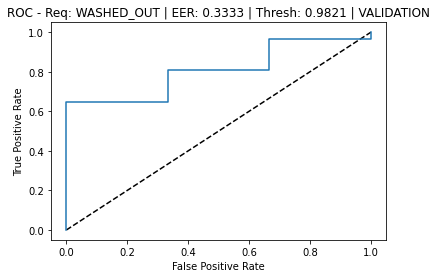

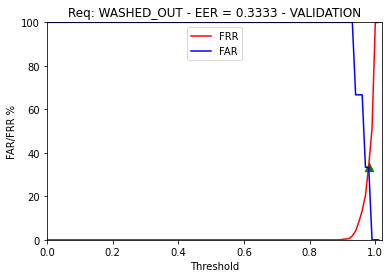

Requisite: WASHED_OUT - EER_interp: 33.33% - Best Threshold: 0.9820684790611273
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.01      0.67      0.02         3
    COMPLIANT       1.00      0.65      0.78       544

     accuracy                           0.65       547
    macro avg       0.50      0.66      0.40       547
 weighted avg       0.99      0.65      0.78       547

Confusion matrix ----------------------------------------
FAR: 33.33% | FRR: 35.29% | EER_mean: 34.31% | TP: 352 | TN: 2 | FP: 1 | FN: 192
Accuracy ------------------------------------------------
Model Accuracy: 64.72%
---------------------------------------------------------
Requisite: PIXELATION


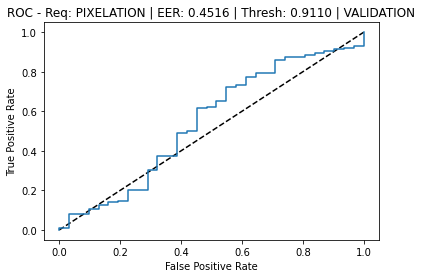

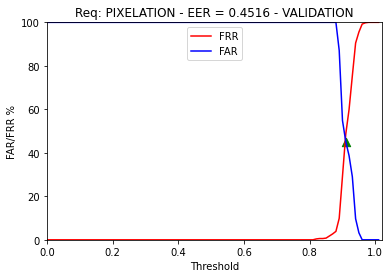

Requisite: PIXELATION - EER_interp: 45.16% - Best Threshold: 0.9109854102134706
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.06      0.55      0.11        31
    COMPLIANT       0.95      0.50      0.65       516

     accuracy                           0.50       547
    macro avg       0.50      0.52      0.38       547
 weighted avg       0.90      0.50      0.62       547

Confusion matrix ----------------------------------------
FAR: 45.16% | FRR: 50.19% | EER_mean: 47.68% | TP: 257 | TN: 17 | FP: 14 | FN: 259
Accuracy ------------------------------------------------
Model Accuracy: 50.09%
---------------------------------------------------------
Requisite: HAIR_EYES


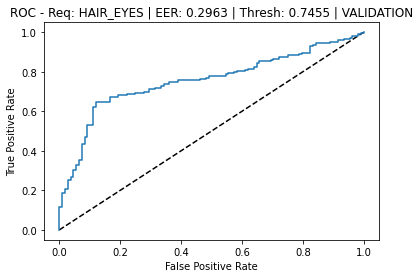

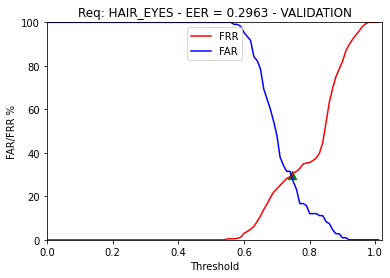

Requisite: HAIR_EYES - EER_interp: 29.630000000000003% - Best Threshold: 0.745525062084205
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.37      0.70      0.48       108
    COMPLIANT       0.91      0.70      0.79       439

     accuracy                           0.70       547
    macro avg       0.64      0.70      0.64       547
 weighted avg       0.80      0.70      0.73       547

Confusion matrix ----------------------------------------
FAR: 29.630000000000003% | FRR: 30.070000000000004% | EER_mean: 29.849999999999998% | TP: 307 | TN: 76 | FP: 32 | FN: 132
Accuracy ------------------------------------------------
Model Accuracy: 70.02000000000001%
---------------------------------------------------------
Requisite: BACKGROUND


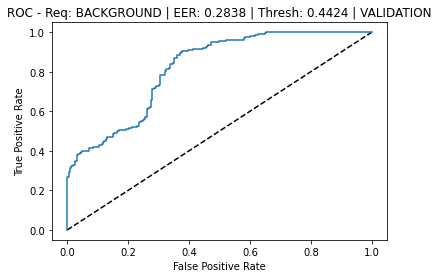

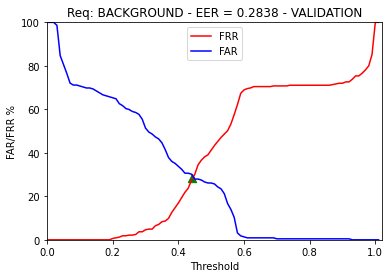

Requisite: BACKGROUND - EER_interp: 28.38% - Best Threshold: 0.442396253347363
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.63      0.72      0.67       222
    COMPLIANT       0.79      0.72      0.75       325

     accuracy                           0.72       547
    macro avg       0.71      0.72      0.71       547
 weighted avg       0.72      0.72      0.72       547

Confusion matrix ----------------------------------------
FAR: 28.38% | FRR: 28.310000000000002% | EER_mean: 28.34% | TP: 233 | TN: 159 | FP: 63 | FN: 92
Accuracy ------------------------------------------------
Model Accuracy: 71.66%
---------------------------------------------------------
Requisite: RED_EYES


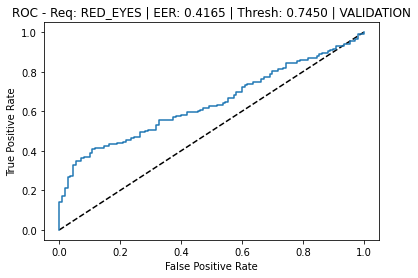

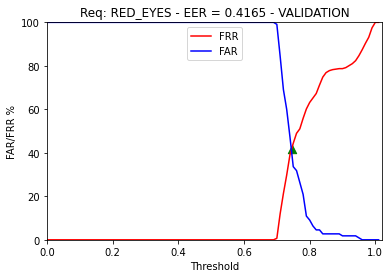

Requisite: RED_EYES - EER_interp: 41.65% - Best Threshold: 0.7450153479859812
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.26      0.59      0.36       110
    COMPLIANT       0.85      0.58      0.69       437

     accuracy                           0.59       547
    macro avg       0.56      0.59      0.53       547
 weighted avg       0.73      0.59      0.63       547

Confusion matrix ----------------------------------------
FAR: 40.910000000000004% | FRR: 41.65% | EER_mean: 41.28% | TP: 255 | TN: 65 | FP: 45 | FN: 182
Accuracy ------------------------------------------------
Model Accuracy: 58.5%
---------------------------------------------------------


In [18]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

Testing Trained Model
Predicting labels....
9/9 [==============================] - 18s 2s/step
Prediction finished!
Requisite: MOUTH


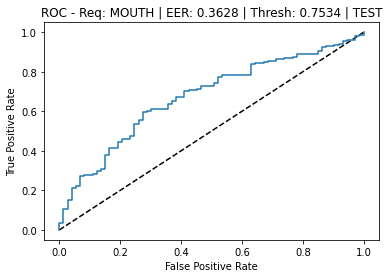

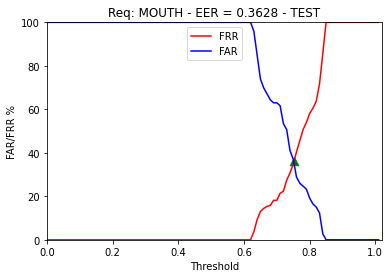

Requisite: MOUTH - EER_interp: 36.28% - Best Threshold: 0.7534285379010579
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.38      0.64      0.47        73
    COMPLIANT       0.84      0.64      0.72       215

     accuracy                           0.64       288
    macro avg       0.61      0.64      0.60       288
 weighted avg       0.72      0.64      0.66       288

Confusion matrix ----------------------------------------
FAR: 35.620000000000005% | FRR: 36.28% | EER_mean: 35.949999999999996% | TP: 137 | TN: 47 | FP: 26 | FN: 78
Accuracy ------------------------------------------------
Model Accuracy: 63.89%
---------------------------------------------------------
Requisite: ROTATION


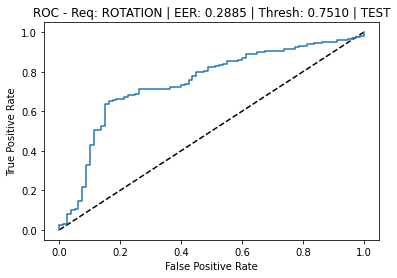

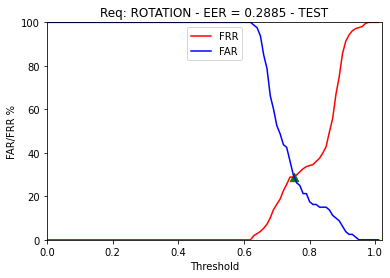

Requisite: ROTATION - EER_interp: 28.849999999999998% - Best Threshold: 0.7510308084579614
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.48      0.70      0.57        80
    COMPLIANT       0.86      0.71      0.78       208

     accuracy                           0.71       288
    macro avg       0.67      0.71      0.68       288
 weighted avg       0.76      0.71      0.72       288

Confusion matrix ----------------------------------------
FAR: 30.0% | FRR: 28.849999999999998% | EER_mean: 29.42% | TP: 148 | TN: 56 | FP: 24 | FN: 60
Accuracy ------------------------------------------------
Model Accuracy: 70.83%
---------------------------------------------------------
Requisite: L_AWAY


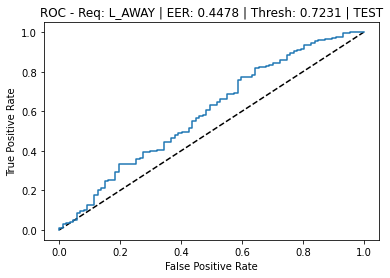

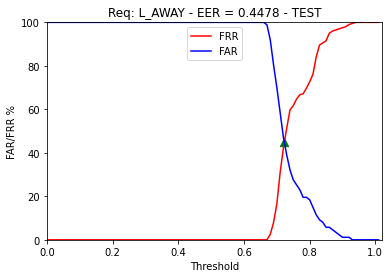

Requisite: L_AWAY - EER_interp: 44.78% - Best Threshold: 0.7230661778307678
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.35      0.56      0.43        87
    COMPLIANT       0.74      0.55      0.63       201

     accuracy                           0.56       288
    macro avg       0.55      0.56      0.53       288
 weighted avg       0.63      0.56      0.57       288

Confusion matrix ----------------------------------------
FAR: 43.68% | FRR: 44.78% | EER_mean: 44.230000000000004% | TP: 111 | TN: 49 | FP: 38 | FN: 90
Accuracy ------------------------------------------------
Model Accuracy: 55.559999999999995%
---------------------------------------------------------
Requisite: EYES_CLOSED


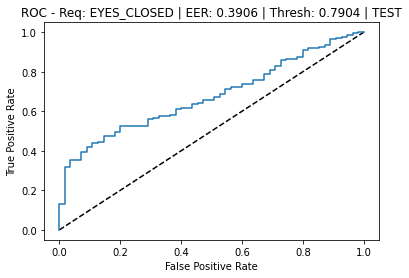

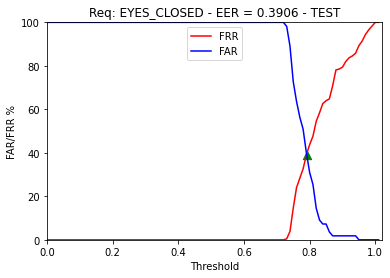

Requisite: EYES_CLOSED - EER_interp: 39.06% - Best Threshold: 0.7903922906249378
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.27      0.62      0.38        55
    COMPLIANT       0.87      0.61      0.72       233

     accuracy                           0.61       288
    macro avg       0.57      0.61      0.55       288
 weighted avg       0.76      0.61      0.65       288

Confusion matrix ----------------------------------------
FAR: 38.18% | FRR: 39.06% | EER_mean: 38.62% | TP: 142 | TN: 34 | FP: 21 | FN: 91
Accuracy ------------------------------------------------
Model Accuracy: 61.11%
---------------------------------------------------------
Requisite: CLOSE


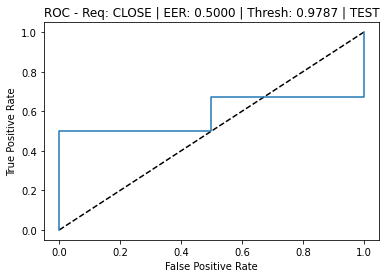

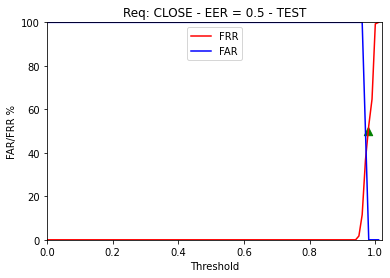

Requisite: CLOSE - EER_interp: 50.0% - Best Threshold: 0.9786865115165713
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.01      0.50      0.01         2
    COMPLIANT       0.99      0.50      0.67       286

     accuracy                           0.50       288
    macro avg       0.50      0.50      0.34       288
 weighted avg       0.99      0.50      0.66       288

Confusion matrix ----------------------------------------
FAR: 50.0% | FRR: 50.0% | EER_mean: 50.0% | TP: 143 | TN: 1 | FP: 1 | FN: 143
Accuracy ------------------------------------------------
Model Accuracy: 50.0%
---------------------------------------------------------
Requisite: HAT


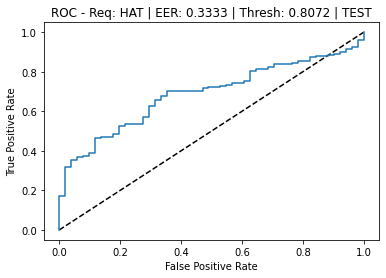

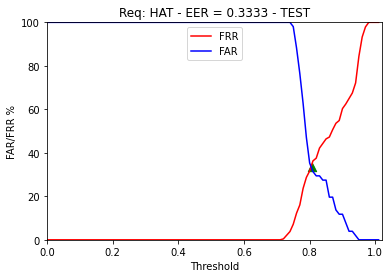

Requisite: HAT - EER_interp: 33.33% - Best Threshold: 0.8071774840354946
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.30      0.67      0.41        51
    COMPLIANT       0.90      0.66      0.76       237

     accuracy                           0.66       288
    macro avg       0.60      0.66      0.59       288
 weighted avg       0.79      0.66      0.70       288

Confusion matrix ----------------------------------------
FAR: 33.33% | FRR: 34.18% | EER_mean: 33.76% | TP: 156 | TN: 34 | FP: 17 | FN: 81
Accuracy ------------------------------------------------
Model Accuracy: 65.97%
---------------------------------------------------------
Requisite: DARK_GLASSES


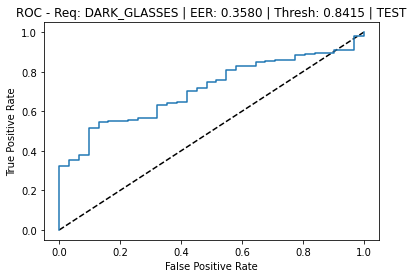

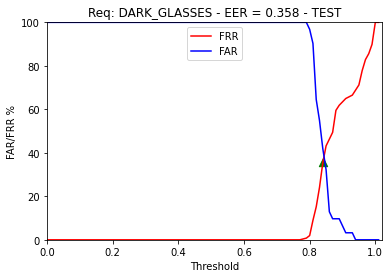

Requisite: DARK_GLASSES - EER_interp: 35.8% - Best Threshold: 0.8415452137531474
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.18      0.65      0.28        31
    COMPLIANT       0.94      0.64      0.76       257

     accuracy                           0.64       288
    macro avg       0.56      0.64      0.52       288
 weighted avg       0.86      0.64      0.71       288

Confusion matrix ----------------------------------------
FAR: 35.480000000000004% | FRR: 35.8% | EER_mean: 35.64% | TP: 165 | TN: 20 | FP: 11 | FN: 92
Accuracy ------------------------------------------------
Model Accuracy: 64.24%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


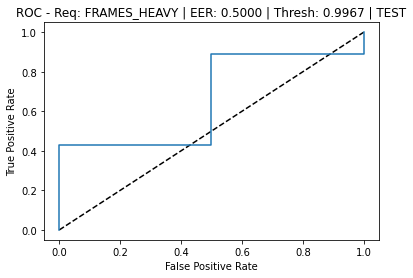

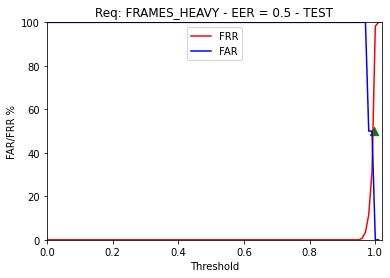

Requisite: FRAMES_HEAVY - EER_interp: 50.0% - Best Threshold: 0.9967327117919925
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.01      0.50      0.01         2
    COMPLIANT       0.99      0.43      0.60       286

     accuracy                           0.43       288
    macro avg       0.50      0.47      0.31       288
 weighted avg       0.99      0.43      0.60       288

Confusion matrix ----------------------------------------
FAR: 50.0% | FRR: 56.989999999999995% | EER_mean: 53.5% | TP: 123 | TN: 1 | FP: 1 | FN: 163
Accuracy ------------------------------------------------
Model Accuracy: 43.059999999999995%
---------------------------------------------------------
Requisite: FRAME_EYES


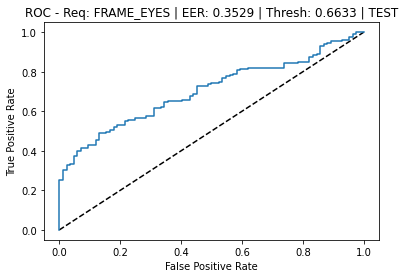

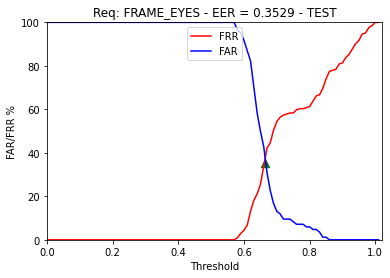

Requisite: FRAME_EYES - EER_interp: 35.29% - Best Threshold: 0.6632617115974427
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.43      0.65      0.52        84
    COMPLIANT       0.82      0.65      0.72       204

     accuracy                           0.65       288
    macro avg       0.63      0.65      0.62       288
 weighted avg       0.71      0.65      0.66       288

Confusion matrix ----------------------------------------
FAR: 34.52% | FRR: 35.29% | EER_mean: 34.9% | TP: 132 | TN: 55 | FP: 29 | FN: 72
Accuracy ------------------------------------------------
Model Accuracy: 64.92999999999999%
---------------------------------------------------------
Requisite: FLASH_LENSES


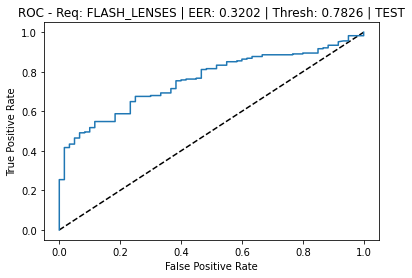

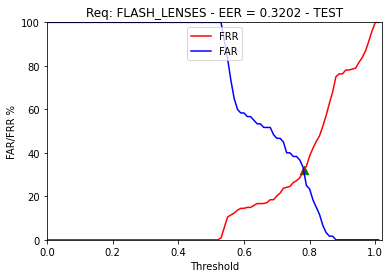

Requisite: FLASH_LENSES - EER_interp: 32.019999999999996% - Best Threshold: 0.7825637083304555
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.36      0.68      0.47        60
    COMPLIANT       0.89      0.68      0.77       228

     accuracy                           0.68       288
    macro avg       0.63      0.68      0.62       288
 weighted avg       0.78      0.68      0.71       288

Confusion matrix ----------------------------------------
FAR: 31.669999999999998% | FRR: 32.019999999999996% | EER_mean: 31.840000000000003% | TP: 155 | TN: 41 | FP: 19 | FN: 73
Accuracy ------------------------------------------------
Model Accuracy: 68.06%
---------------------------------------------------------
Requisite: VEIL


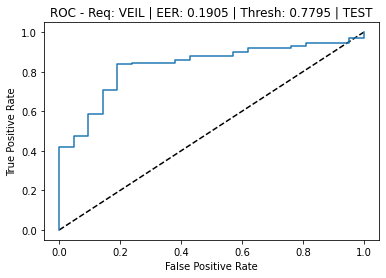

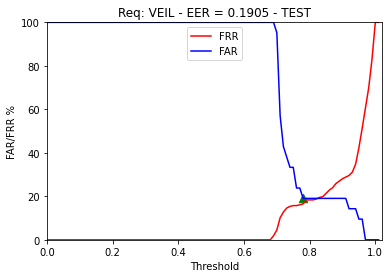

Requisite: VEIL - EER_interp: 19.05% - Best Threshold: 0.7795490622520036
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.28      0.81      0.42        21
    COMPLIANT       0.98      0.84      0.91       267

     accuracy                           0.84       288
    macro avg       0.63      0.82      0.66       288
 weighted avg       0.93      0.84      0.87       288

Confusion matrix ----------------------------------------
FAR: 19.05% | FRR: 16.1% | EER_mean: 17.580000000000002% | TP: 224 | TN: 17 | FP: 4 | FN: 43
Accuracy ------------------------------------------------
Model Accuracy: 83.67999999999999%
---------------------------------------------------------
Requisite: REFLECTION


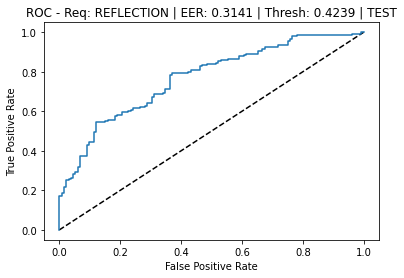

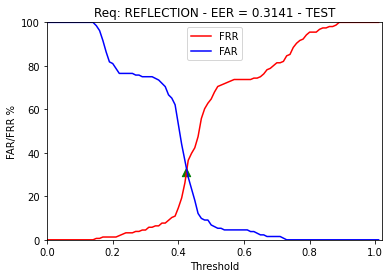

Requisite: REFLECTION - EER_interp: 31.41% - Best Threshold: 0.42392240235438716
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.65      0.69      0.67       132
    COMPLIANT       0.72      0.69      0.70       156

     accuracy                           0.69       288
    macro avg       0.69      0.69      0.69       288
 weighted avg       0.69      0.69      0.69       288

Confusion matrix ----------------------------------------
FAR: 31.06% | FRR: 31.41% | EER_mean: 31.240000000000002% | TP: 107 | TN: 91 | FP: 41 | FN: 49
Accuracy ------------------------------------------------
Model Accuracy: 68.75%
---------------------------------------------------------
Requisite: LIGHT


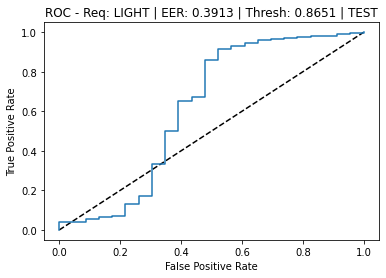

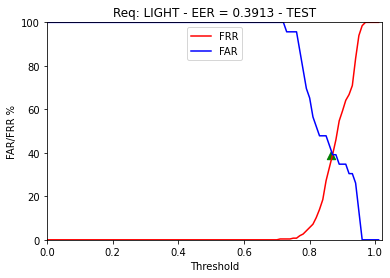

Requisite: LIGHT - EER_interp: 39.129999999999995% - Best Threshold: 0.8650904297828664
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.13      0.61      0.22        23
    COMPLIANT       0.95      0.65      0.77       265

     accuracy                           0.65       288
    macro avg       0.54      0.63      0.50       288
 weighted avg       0.89      0.65      0.73       288

Confusion matrix ----------------------------------------
FAR: 39.129999999999995% | FRR: 34.72% | EER_mean: 36.919999999999995% | TP: 173 | TN: 14 | FP: 9 | FN: 92
Accuracy ------------------------------------------------
Model Accuracy: 64.92999999999999%
---------------------------------------------------------
Requisite: SH_FACE


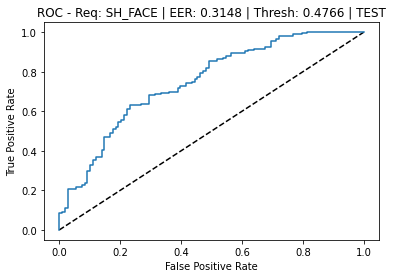

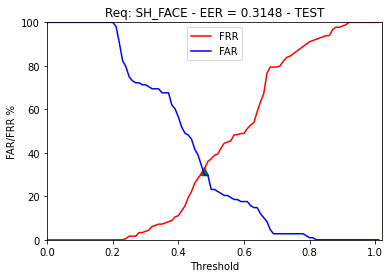

Requisite: SH_FACE - EER_interp: 31.480000000000004% - Best Threshold: 0.47656798362743824
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.56      0.69      0.62       108
    COMPLIANT       0.78      0.68      0.73       180

     accuracy                           0.68       288
    macro avg       0.67      0.68      0.67       288
 weighted avg       0.70      0.68      0.69       288

Confusion matrix ----------------------------------------
FAR: 31.480000000000004% | FRR: 31.669999999999998% | EER_mean: 31.569999999999997% | TP: 123 | TN: 74 | FP: 34 | FN: 57
Accuracy ------------------------------------------------
Model Accuracy: 68.4%
---------------------------------------------------------
Requisite: SH_HEAD


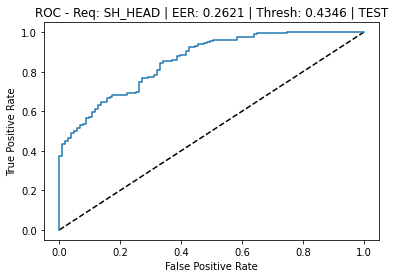

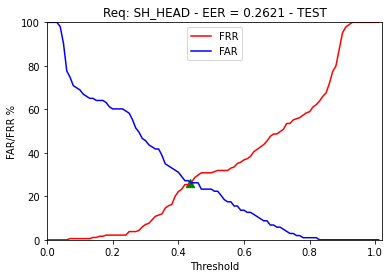

Requisite: SH_HEAD - EER_interp: 26.21% - Best Threshold: 0.43456912040685797
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.62      0.74      0.67       103
    COMPLIANT       0.84      0.75      0.79       185

     accuracy                           0.74       288
    macro avg       0.73      0.74      0.73       288
 weighted avg       0.76      0.74      0.75       288

Confusion matrix ----------------------------------------
FAR: 26.21% | FRR: 25.41% | EER_mean: 25.81% | TP: 138 | TN: 76 | FP: 27 | FN: 47
Accuracy ------------------------------------------------
Model Accuracy: 74.31%
---------------------------------------------------------
Requisite: BLURRED


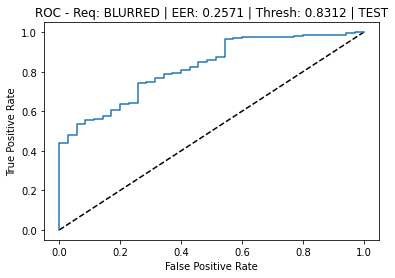

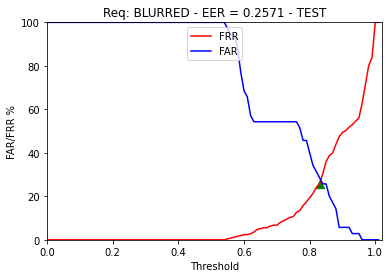

Requisite: BLURRED - EER_interp: 25.71% - Best Threshold: 0.8312346935271963
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.29      0.74      0.41        35
    COMPLIANT       0.95      0.74      0.84       253

     accuracy                           0.74       288
    macro avg       0.62      0.74      0.62       288
 weighted avg       0.87      0.74      0.78       288

Confusion matrix ----------------------------------------
FAR: 25.71% | FRR: 25.69% | EER_mean: 25.7% | TP: 188 | TN: 26 | FP: 9 | FN: 65
Accuracy ------------------------------------------------
Model Accuracy: 74.31%
---------------------------------------------------------
Requisite: SKIN_TONE


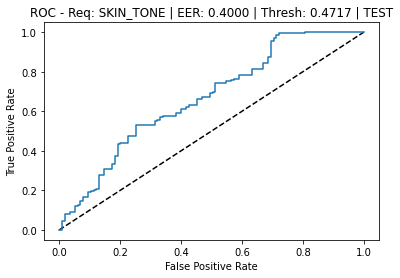

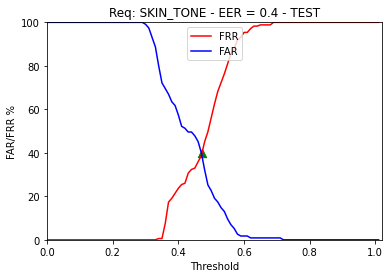

Requisite: SKIN_TONE - EER_interp: 40.0% - Best Threshold: 0.47170284390452716
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.49      0.60      0.54       115
    COMPLIANT       0.69      0.59      0.64       173

     accuracy                           0.59       288
    macro avg       0.59      0.59      0.59       288
 weighted avg       0.61      0.59      0.60       288

Confusion matrix ----------------------------------------
FAR: 40.0% | FRR: 41.04% | EER_mean: 40.52% | TP: 102 | TN: 69 | FP: 46 | FN: 71
Accuracy ------------------------------------------------
Model Accuracy: 59.38%
---------------------------------------------------------
Requisite: WASHED_OUT


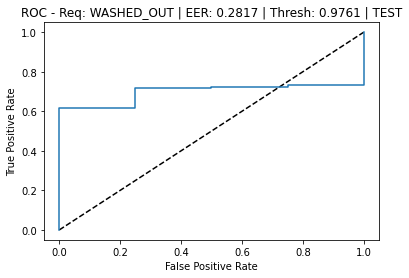

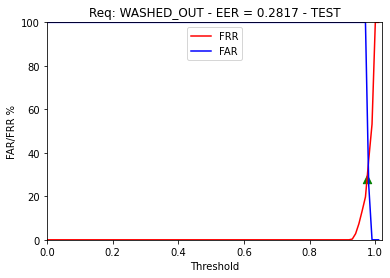

Requisite: WASHED_OUT - EER_interp: 28.17% - Best Threshold: 0.9761054918799602
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.04      0.75      0.07         4
    COMPLIANT       1.00      0.72      0.83       284

     accuracy                           0.72       288
    macro avg       0.52      0.73      0.45       288
 weighted avg       0.98      0.72      0.82       288

Confusion matrix ----------------------------------------
FAR: 25.0% | FRR: 28.17% | EER_mean: 26.590000000000003% | TP: 204 | TN: 3 | FP: 1 | FN: 80
Accuracy ------------------------------------------------
Model Accuracy: 71.88%
---------------------------------------------------------
Requisite: PIXELATION


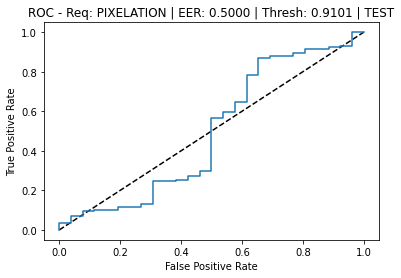

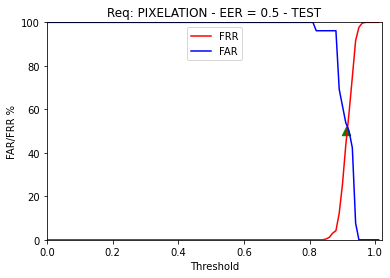

Requisite: PIXELATION - EER_interp: 50.0% - Best Threshold: 0.9100634455680842
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.10      0.50      0.17        26
    COMPLIANT       0.92      0.56      0.70       262

     accuracy                           0.56       288
    macro avg       0.51      0.53      0.43       288
 weighted avg       0.85      0.56      0.65       288

Confusion matrix ----------------------------------------
FAR: 50.0% | FRR: 43.51% | EER_mean: 46.760000000000005% | TP: 148 | TN: 13 | FP: 13 | FN: 114
Accuracy ------------------------------------------------
Model Accuracy: 55.900000000000006%
---------------------------------------------------------
Requisite: HAIR_EYES


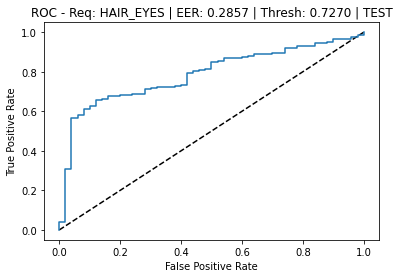

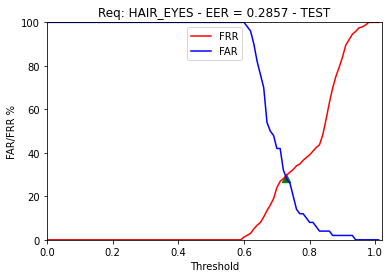

Requisite: HAIR_EYES - EER_interp: 28.57% - Best Threshold: 0.727048431124006
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.35      0.72      0.47        50
    COMPLIANT       0.92      0.71      0.81       238

     accuracy                           0.72       288
    macro avg       0.64      0.72      0.64       288
 weighted avg       0.82      0.72      0.75       288

Confusion matrix ----------------------------------------
FAR: 28.000000000000004% | FRR: 28.57% | EER_mean: 28.29% | TP: 170 | TN: 36 | FP: 14 | FN: 68
Accuracy ------------------------------------------------
Model Accuracy: 71.53%
---------------------------------------------------------
Requisite: BACKGROUND


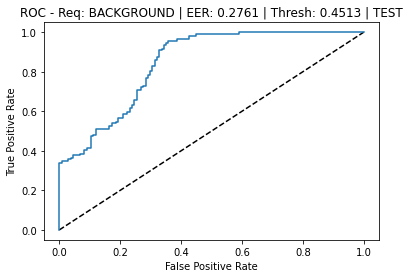

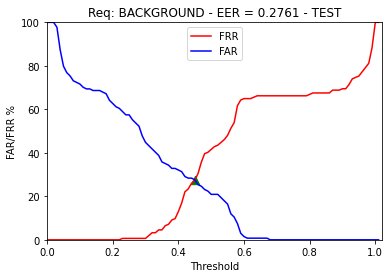

Requisite: BACKGROUND - EER_interp: 27.61% - Best Threshold: 0.45128265023237
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.69      0.72      0.71       134
    COMPLIANT       0.75      0.72      0.74       154

     accuracy                           0.72       288
    macro avg       0.72      0.72      0.72       288
 weighted avg       0.72      0.72      0.72       288

Confusion matrix ----------------------------------------
FAR: 27.61% | FRR: 27.92% | EER_mean: 27.76% | TP: 111 | TN: 97 | FP: 37 | FN: 43
Accuracy ------------------------------------------------
Model Accuracy: 72.22%
---------------------------------------------------------
Requisite: RED_EYES


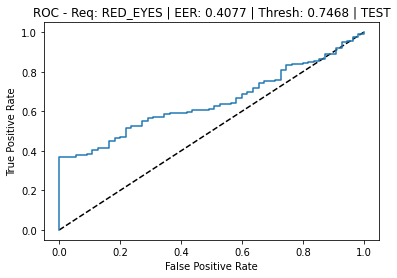

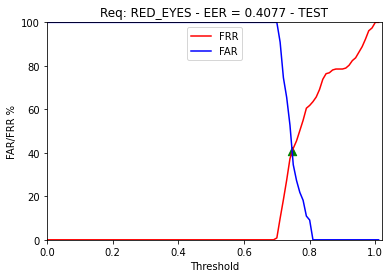

Requisite: RED_EYES - EER_interp: 40.77% - Best Threshold: 0.7468417919585975
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.26      0.62      0.37        55
    COMPLIANT       0.87      0.59      0.70       233

     accuracy                           0.60       288
    macro avg       0.57      0.61      0.54       288
 weighted avg       0.75      0.60      0.64       288

Confusion matrix ----------------------------------------
FAR: 38.18% | FRR: 40.77% | EER_mean: 39.48% | TP: 138 | TN: 34 | FP: 21 | FN: 95
Accuracy ------------------------------------------------
Model Accuracy: 59.72%
---------------------------------------------------------


In [19]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Vizualize Model Classification

# Finishing Experiment Manager

In [ ]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
